# KT 1
## Kirill Zakharov 
2022

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

%matplotlib inline

plt.style.use('ggplot')
sns.set_palette('mako')
sns.set_style('darkgrid')

In [75]:
gdp_current_us = pd.read_csv('GDP_current_US_036.csv', skiprows=2, header=1)
gdp_growth_annual = pd.read_csv('GDP_growth_annual.csv', skiprows=2, header=1)
gdp_per_capita_lcu = pd.read_csv('GDP_per_capita_current_LCU.csv', skiprows=2, header=1)
gdp_per_capita_ga = pd.read_csv('GDP_per_capita_growth_annual.csv', skiprows=2, header=1)
inflation_GDP_deflator = pd.read_csv('inflation_GDP_deflator_annual.csv', skiprows=2, header=1)

In [76]:
gdp_current_us = gdp_current_us[gdp_current_us['Country Name'] == 'Korea, Rep.']
gdp_current_us = gdp_current_us.iloc[:,4:-1].T

In [77]:
gdp_growth_annual = gdp_growth_annual[gdp_growth_annual['Country Name'] == 'Korea, Rep.']
gdp_growth_annual = gdp_growth_annual.iloc[:,4:-1].T

In [78]:
gdp_per_capita_lcu = gdp_per_capita_lcu[gdp_per_capita_lcu['Country Name'] == 'Korea, Rep.']
gdp_per_capita_lcu = gdp_per_capita_lcu.iloc[:,4:-1].T

In [83]:
gdp_per_capita_ga = gdp_per_capita_ga[gdp_per_capita_ga['Country Name'] == 'Korea, Rep.']
gdp_per_capita_ga = gdp_per_capita_ga.iloc[:,4:-1].T

In [88]:
inflation_GDP_deflator = inflation_GDP_deflator[inflation_GDP_deflator['Country Name'] == 'Korea, Rep.']
inflation_GDP_deflator = inflation_GDP_deflator.iloc[:,4:-1].T

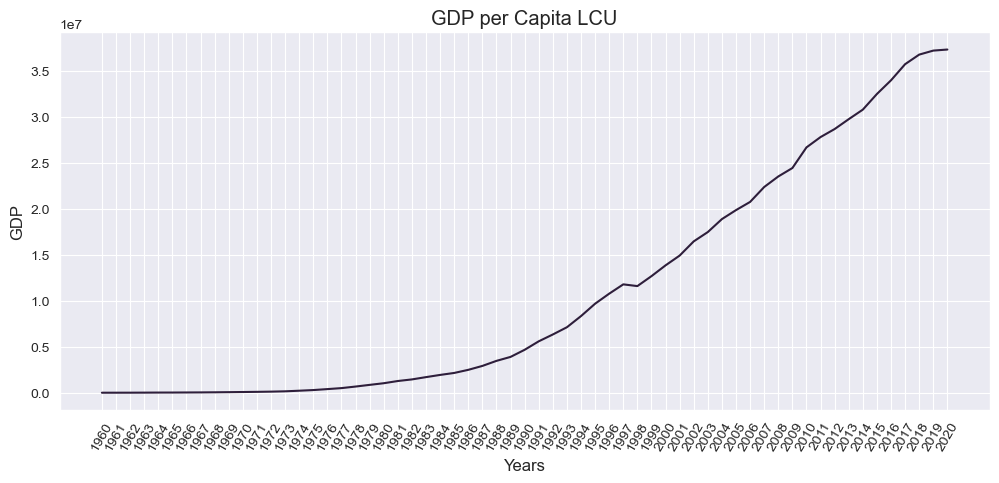

In [79]:
plt.subplots(figsize=(12, 5), dpi=100)

plt.plot(gdp_per_capita_lcu)

plt.title('GDP per Capita LCU')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.xticks(rotation=60, fontsize=10)
plt.show()

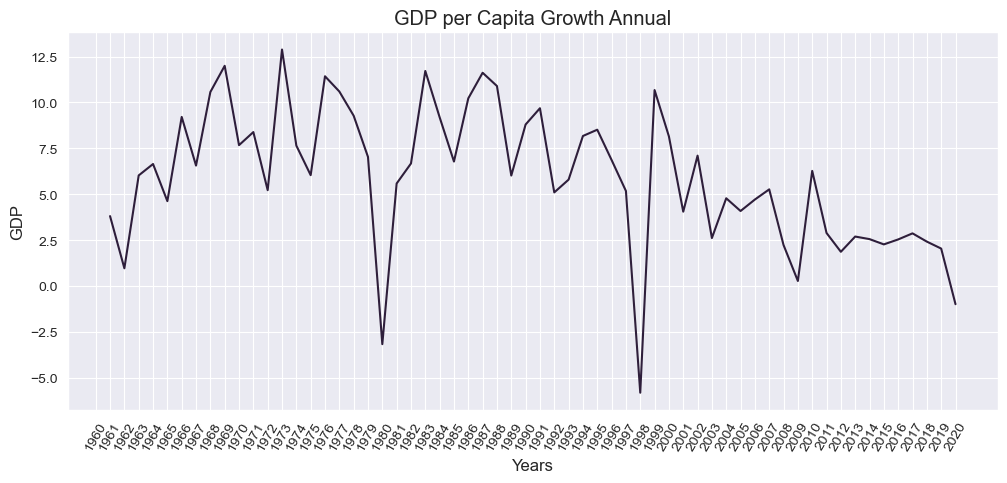

In [84]:
plt.subplots(figsize=(12, 5), dpi=100)

plt.plot(gdp_per_capita_ga)

plt.title('GDP per Capita Growth Annual')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.xticks(rotation=60, fontsize=10)
plt.show()

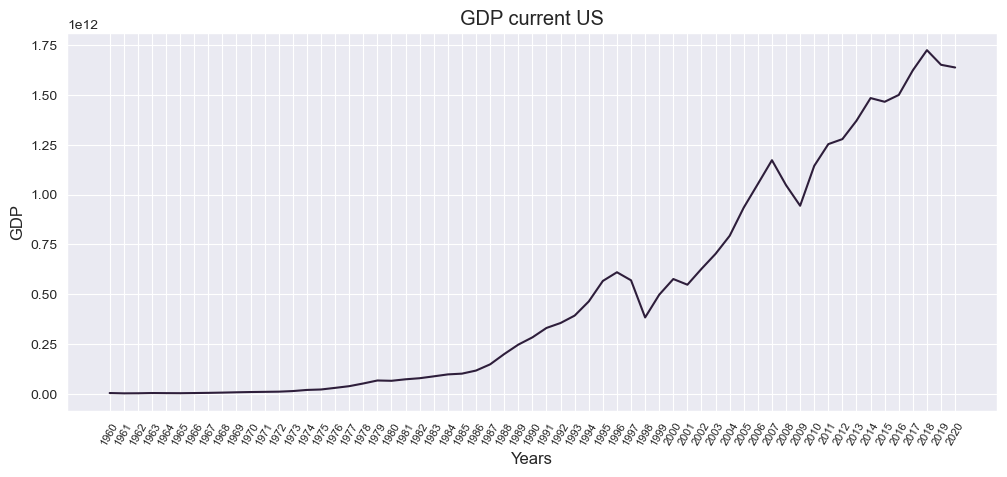

In [85]:
plt.subplots(figsize=(12, 5), dpi=100)

plt.plot(gdp_current_us)

plt.title('GDP current US')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.xticks(rotation=60, fontsize=8)
plt.show()

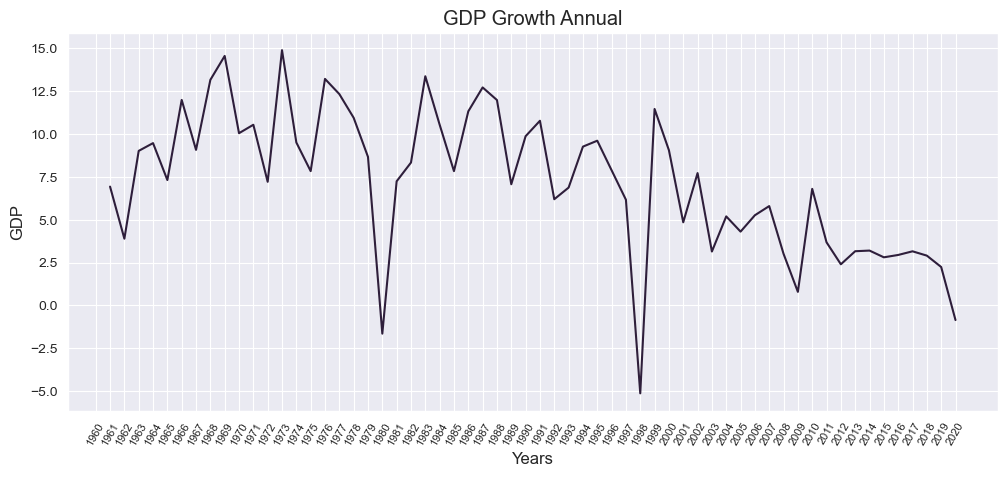

In [86]:
plt.subplots(figsize=(12, 5), dpi=100)

plt.plot(gdp_growth_annual)

plt.title('GDP Growth Annual')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.xticks(rotation=60, fontsize=8)
plt.show()

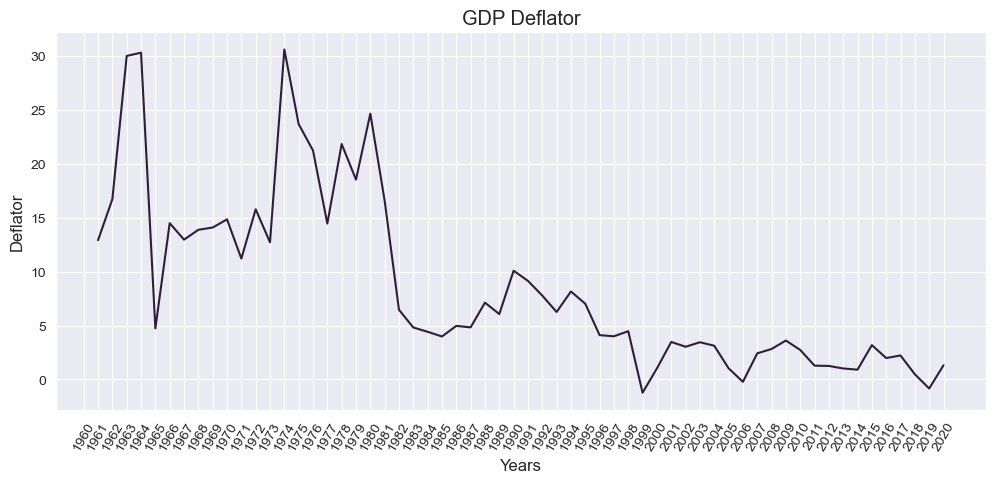

In [90]:
plt.subplots(figsize=(12, 5), dpi=100)

plt.plot(inflation_GDP_deflator)

plt.title('GDP Deflator')
plt.xlabel('Years')
plt.ylabel('Deflator')
plt.xticks(rotation=60, fontsize=10)
plt.show()

# Forecasting

In [99]:
gdp = gdp_current_us
gdp = gdp.reset_index()
gdp.columns = ['ds', 'y']

In [102]:
model = Prophet(weekly_seasonality=False, daily_seasonality=False)
model.fit(gdp)

In [103]:
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

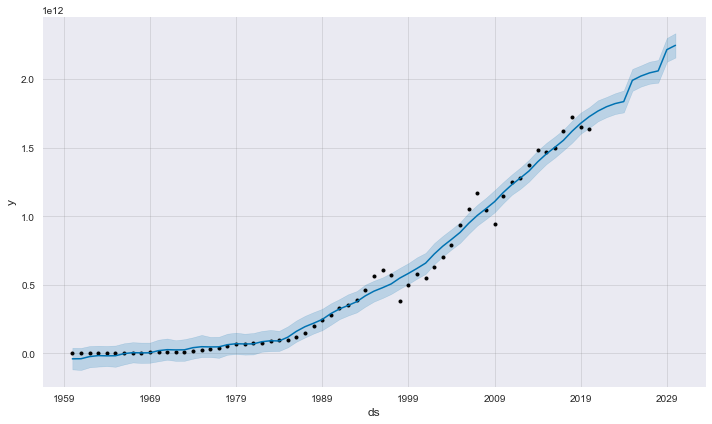

In [104]:
model.plot(forecast)
plt.show()